
# Feature importances with a forest of trees

This example shows the use of a forest of trees to evaluate the importance of
features on an artificial classification task. The blue bars are the feature
importances of the forest, along with their inter-trees variability represented
by the error bars.

As expected, the plot suggests that 3 features are informative, while the
remaining are not.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import LinearSVC


## Data generation and model fitting
We generate a synthetic dataset with only 3 informative features. We will
explicitly not shuffle the dataset to ensure that the informative features
will correspond to the three first columns of X. In addition, we will split
our dataset into training and testing subsets.



In [2]:
df= pd.read_csv("Dataset.csv")
df.drop(df.columns[[0]], axis=1, inplace=True)
X= df.drop("y", axis = 1)
y = df["y"]


In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

A random forest classifier will be fitted to compute the feature importances.



In [4]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

## Feature importance based on mean decrease in impurity
Feature importances are provided by the fitted attribute
`feature_importances_` and they are computed as the mean and standard
deviation of accumulation of the impurity decrease within each tree.

<div class="alert alert-danger"><h4>Warning</h4><p>Impurity-based feature importances can be misleading for **high
    cardinality** features (many unique values). See
    `permutation_importance` as an alternative below.</p></div>



In [5]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.011 seconds


Let's plot the impurity-based importance.



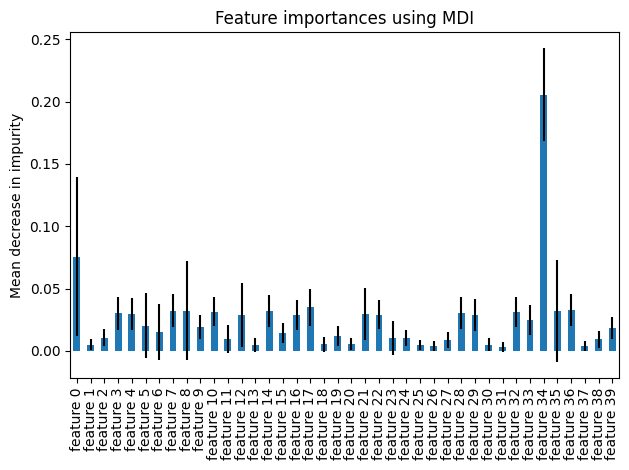

In [6]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [13]:
forest_importances.sort_values(ascending=False) 

feature 34    0.022136
feature 0     0.003883
feature 8     0.003398
feature 35    0.002136
feature 18    0.001456
feature 6     0.001165
feature 23    0.000680
feature 1     0.000388
feature 5     0.000291
feature 37    0.000097
feature 15    0.000097
feature 27   -0.000097
feature 26   -0.000291
feature 30   -0.000388
feature 2    -0.000388
feature 24   -0.000388
feature 31   -0.000485
feature 19   -0.000583
feature 14   -0.000777
feature 13   -0.000777
feature 16   -0.000777
feature 36   -0.000971
feature 20   -0.000971
feature 21   -0.001165
feature 33   -0.001262
feature 25   -0.001262
feature 39   -0.001845
feature 4    -0.001845
feature 28   -0.001942
feature 12   -0.002039
feature 7    -0.002136
feature 29   -0.002136
feature 3    -0.002233
feature 10   -0.002330
feature 9    -0.002427
feature 38   -0.002524
feature 22   -0.002524
feature 11   -0.002816
feature 17   -0.003204
feature 32   -0.003301
dtype: float64

In [14]:
f=[34,0,8,35,18,6,23,1,5,37,15,27,26,30,2,24,31,19,14,13]
for i in f:
    print(X.columns[i])

x_8
x_1
x_18
x_80
x_45
x_144
x_60
x_109
x_127
x_89
x_38
x_68
x_67
x_71
x_113
x_62
x_73
x_52
x_33
x_30


We observe that, as expected, the three first features are found important.

## Feature importance based on feature permutation
Permutation feature importance overcomes limitations of the impurity-based
feature importance: they do not have a bias toward high-cardinality features
and can be computed on a left-out test set.



In [7]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 4.951 seconds


The computation for full permutation importance is more costly. Features are
shuffled n times and the model refitted to estimate the importance of it.
Please see `permutation_importance` for more details. We can now plot
the importance ranking.



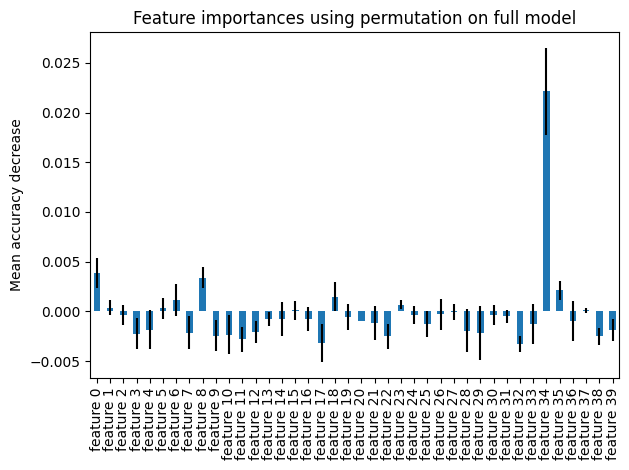

In [8]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [15]:
forest_importances

feature 0     0.003883
feature 1     0.000388
feature 2    -0.000388
feature 3    -0.002233
feature 4    -0.001845
feature 5     0.000291
feature 6     0.001165
feature 7    -0.002136
feature 8     0.003398
feature 9    -0.002427
feature 10   -0.002330
feature 11   -0.002816
feature 12   -0.002039
feature 13   -0.000777
feature 14   -0.000777
feature 15    0.000097
feature 16   -0.000777
feature 17   -0.003204
feature 18    0.001456
feature 19   -0.000583
feature 20   -0.000971
feature 21   -0.001165
feature 22   -0.002524
feature 23    0.000680
feature 24   -0.000388
feature 25   -0.001262
feature 26   -0.000291
feature 27   -0.000097
feature 28   -0.001942
feature 29   -0.002136
feature 30   -0.000388
feature 31   -0.000485
feature 32   -0.003301
feature 33   -0.001262
feature 34    0.022136
feature 35    0.002136
feature 36   -0.000971
feature 37    0.000097
feature 38   -0.002524
feature 39   -0.001845
dtype: float64

In [16]:
ff= [0,1,5,6,8,15,18,23,34,35,37]
for i in ff:
    print(X.columns[i])

x_1
x_109
x_127
x_144
x_18
x_38
x_45
x_60
x_8
x_80
x_89


forest_importances.The same features are detected as most important using both methods. Although
the relative importances vary. As seen on the plots, MDI is less likely than
permutation importance to fully omit a feature.

